In [7]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt

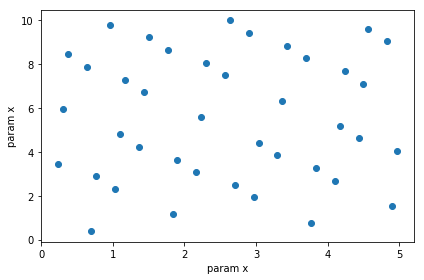

In [8]:
# Code to generate low discrepancy quasirandom sequences
# Code by Martin Roberts 
# Ref.: http://extremelearning.com.au/unreasonable-effectiveness-of-quasirandom-sequences/

def get_quasirandom_sequence(dim, num_samples):

    # Using the above nested radical formula for g=phi_d
    # or you could just hard-code it.
    # phi(1) = 1.61803398874989484820458683436563
    # phi(2) = 1.32471795724474602596090885447809
    def phi(d):
        x=2.0000
        for i in range(10):
            x = pow(1+x,1/(d+1))
            return x

    # Number of dimensions.
    d=dim

    # number of required points
    n=num_samples

    g = phi(d)
    alpha = np.zeros(d)
    for j in range(d):
          alpha[j] = pow(1/g,j+1) %1
          z = np.zeros((n, d))

    # This number can be any real number.
    # Common default setting is typically seed=0
    # But seed = 0.5 is generally better.
    seed=0.5
    for i in range(n):
          z[i] = (seed + alpha*(i+1)) %1

    return z


# Get a quasi-random sequence

# Number of points used for the "emulator"
number_design_emulator_per_dimension=20*2                #<=========================================================

number_of_observables=2

unit_random_sequence=get_quasirandom_sequence(number_of_observables, number_design_emulator_per_dimension)

# Info about parameters
xmin, xmax = 0,5
x_label="param x"

ymin, ymax = 0, 10
y_label="param x"

# Get the design points
design_points = np.array([ (xmin+a*(xmax-xmin),ymin+b*(ymax-ymin)) for (a,b) in unit_random_sequence ])
design_x, design_y = design_points.T

#print(design_points)

# Plot the design points

plt.figure()
plt.xscale('linear')
plt.yscale('linear')
#plt.xlim(0,2)
#plt.ylim(1e-5,1e2)
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.scatter(design_x,design_y)

#plt.legend(loc='upper right',fontsize=16)
plt.tight_layout()
plt.show()
